## Домашнее задание  
1. Скачать датасет с фразами симпосонов - https://github.com/sujanjoejacob/Text-mining-with-Simpsons-Data  
2. Обучить word2vec на фразах персонажей  
3. Визуаилизировать embeddings по самым частотным словам (top 1000)  
4. Найти самые близкие слова для:  
  homer - marge + bart  
  bart - lisa + school  
  marge - homer + home  
5* попробовать построить классификатор bart/lisa с использованием этих эмбеддингов  

In [251]:
# !pip install gensim

In [252]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [253]:
from gensim.models import Word2Vec
from csv import reader
import re
import csv
import pandas as pd

In [254]:
col_list = ["raw_character_text", "spoken_words"]

df = pd.read_csv('D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/Text-mining-with-Simpsons-Data-master/simpsons_script_lines.csv', usecols=col_list)
df = df.dropna().reset_index(drop=True).drop_duplicates()

In [255]:
df.head()

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


In [256]:
df['cleaned_text'] = df.spoken_words.apply(lambda x: re.sub(r"[-()\"#/@;:$!<>{}=~|.?,]", "", str(x)))

In [257]:
# df['cleaned_text'] = df.cleaned_text.apply(lambda x: x.split())

In [258]:
list_of_sent = df.cleaned_text.tolist()

In [259]:
corpus_of_sent = []
for sent in list_of_sent:
    sent = sent.split()
    corpus_of_sent.append(sent)
#     print(sent)
#     break

In [260]:
corpus_of_sent[0]

['No',
 'actually',
 'it',
 'was',
 'a',
 'little',
 'of',
 'both',
 'Sometimes',
 'when',
 'a',
 'disease',
 'is',
 'in',
 'all',
 'the',
 'magazines',
 'and',
 'all',
 'the',
 'news',
 'shows',
 "it's",
 'only',
 'natural',
 'that',
 'you',
 'think',
 'you',
 'have',
 'it']

# 2. Обучить word2vec на фразах персонажей  

In [261]:
# define training data
sentences = corpus_of_sent
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)

INFO - 11:38:14: collecting all words and their counts
INFO - 11:38:14: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 11:38:14: PROGRESS: at sentence #10000, processed 99013 words, keeping 12468 word types
INFO - 11:38:14: PROGRESS: at sentence #20000, processed 203137 words, keeping 19628 word types
INFO - 11:38:14: PROGRESS: at sentence #30000, processed 314821 words, keeping 25917 word types
INFO - 11:38:14: PROGRESS: at sentence #40000, processed 416132 words, keeping 30236 word types
INFO - 11:38:14: PROGRESS: at sentence #50000, processed 511065 words, keeping 34489 word types
INFO - 11:38:14: PROGRESS: at sentence #60000, processed 598665 words, keeping 38047 word types
INFO - 11:38:14: PROGRESS: at sentence #70000, processed 700062 words, keeping 42017 word types
INFO - 11:38:14: PROGRESS: at sentence #80000, processed 804966 words, keeping 45808 word types
INFO - 11:38:14: PROGRESS: at sentence #90000, processed 906519 words, keeping 49152 word types

Word2Vec(vocab=60341, vector_size=100, alpha=0.025)


In [263]:
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
print(model.wv['sentence'])
# save model
model.save('D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/model.bin')
# load model
new_model = Word2Vec.load('D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/model.bin')
print(new_model)

INFO - 11:38:58: Word2Vec lifecycle event {'fname_or_handle': 'D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/model.bin', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2021-03-28T11:38:58.002775', 'gensim': '4.0.0', 'python': '3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'saving'}
INFO - 11:38:58: not storing attribute cum_table
INFO - 11:38:58: saved D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/model.bin
INFO - 11:38:58: loading Word2Vec object from D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/model.bin
INFO - 11:38:58: loading wv recursively from D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/model.bin.wv.* with mmap=None
INFO - 11:38:58: setting ignored attribute cum_table to None


['the', 'I', 'you', 'a', 'to', 'of', 'and', 'it', 'in', 'is', 'that', 'my', 'me', 'for', 'your', "I'm", 'this', 'on', 'Oh', 'have', 'be', 'You', 'with', 'we', 'like', 'just', 'are', 'do', 'was', "don't", 'not', 'Well', 'And', 'all', 'know', 'get', 'out', 'up', 'at', 'can', 'one', 'what', 'The', 'Homer', 'Hey', 'here', 'but', 'so', 'right', 'No', 'But', 'got', 'no', "It's", 'What', 'about', 'Bart', 'go', "I'll", "it's", 'Now', "you're", 'our', 'now', 'from', 'if', 'think', 'want', 'Marge', 'see', 'will', 'gonna', 'an', 'as', 'This', 'he', "That's", "can't", 'there', 'back', 'him', 'us', 'A', "I've", 'We', 'some', 'little', 'time', 'good', 'could', 'Dad', 'Simpson', 'man', 'they', 'his', 'never', 'So', 'Yeah', 'Lisa', "that's", 'say', 'how', 'did', "You're", 'make', 'take', 'been', 'more', 'by', 'going', 'would', 'who', 'when', 'her', 'has', 'Okay', 'All', 'My', 'way', 'really', 'down', 'off', 'or', 'Mr', 'love', 'were', 'It', 'Why', 'need', 'look', 'only', 'too', 'come', 'had', "Don't",

INFO - 11:38:59: Word2Vec lifecycle event {'fname': 'D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/model.bin', 'datetime': '2021-03-28T11:38:59.074778', 'gensim': '4.0.0', 'python': '3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}


Word2Vec(vocab=60341, vector_size=100, alpha=0.025)


# 3. Визуаилизировать embeddings по самым частотным словам (top 1000)  

In [264]:
# X = model.wv[model.wv.index_to_key]

In [265]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)

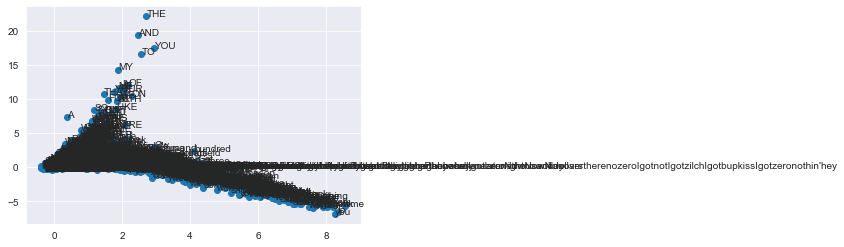

In [270]:
# plt.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.key_to_index)
# for i, word in enumerate(words):
# 	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# plt.show()

In [281]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

60341

In [282]:
top_1000 = sorted(word_freq, key=word_freq.get, reverse=True)[:1000]

In [283]:
X = model.wv[top_1000]

In [284]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

IndexError: index 1000 is out of bounds for axis 0 with size 1000

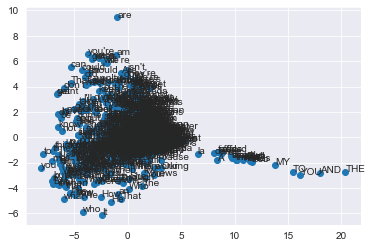

In [285]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# 4. Найти самые близкие слова для:  
  homer - marge + bart  
  bart - lisa + school  
  marge - homer + home  

In [266]:
from gensim.models import KeyedVectors
# load the google word2vec model
# filename = 'GoogleNews-vectors-negative300.bin.gz'
# model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
# result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=10)
# print(result)

In [267]:
model.wv.most_similar(positive=["Homer", "Bart"], negative=["Marge"], topn=3)

[('Lisa', 0.8974465727806091),
 ('Grampa', 0.7813326120376587),
 ('Dad', 0.7604727745056152)]

In [268]:
model.wv.most_similar(positive=["Bart", "school"], negative=["Lisa"], topn=3)

[('house', 0.830822765827179),
 ('game', 0.8044182658195496),
 ('once', 0.7807655334472656)]

In [269]:
model.wv.most_similar(positive=["Marge", "home"], negative=["Homer"], topn=3)

[('back', 0.8711822032928467),
 ('sleep', 0.763541579246521),
 ('school', 0.7465500831604004)]

# Research

https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

In [ ]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

# Preprocessing

In [ ]:
col_list = ["raw_character_text", "spoken_words"]

df = pd.read_csv('D:/Backup/Курс Нетология/Глубокое обучение/12 Text/dll_hw_9_hw_text1/Text-mining-with-Simpsons-Data-master/simpsons_script_lines.csv', usecols=col_list)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

In [ ]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
sent = [row.split() for row in df_clean['clean']]

In [ ]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [ ]:
bigram = Phraser(phrases)

In [ ]:
sentences = bigram[sent]

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

# Training the model

In [ ]:
import multiprocessing

from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count() # Count the number of cores in a computer

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
#                      size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

# Building the Vocabulary Table:

In [ ]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

# Training of the model:

In [ ]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

In [ ]:
w2v_model.init_sims(replace=True)

# Exploring the model

  homer - marge + bart  
  bart - lisa + school  
  marge - homer + home  

In [ ]:
w2v_model.wv.most_similar(positive=["homer", "bart"], negative=["marge"], topn=3)

In [ ]:
w2v_model.wv.most_similar(positive=["bart", "school"], negative=["lisa"], topn=3)

In [ ]:
w2v_model.wv.most_similar(positive=["marge", "home"], negative=["homer"], topn=3)

# t-SNE visualizations:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [ ]:
tsnescatterplot(w2v_model, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'mel', 'apu', 'duff'])

In [ ]:
tsnescatterplot(w2v_model.wv, "mr_burn", [t[0] for t in w2v_model.wv.most_similar(positive=["mr_burn"], topn=20)][10:])